# Assignment Task 2: Visualise Data Insights using Seaborn (15 marks)

# Sub Task 1: Data Preparation(2 marks)

* Import libraries and load data
* Change the labelling for better interpretation/ visualization understanding

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme()
sns.color_palette()
plt.rcParams['font.size'] = 6

In [2]:
df = pd.read_csv('./cardiac_disease.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,caa,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# change the labelling for better interpretation/ visualization understanding
columns_to_replace = {
    "slope": {0: "downsloping", 1: "flat", 2: "upsloping"}, 
    "thal": {1: "normal", 2: "fixed defect", 3: "reversable_defect"}, 
    "target": {1: "Disease", 0: "No disease"}, 
    "sex": {0: "Female", 1: "Male"},
    "cp": {0: "asymptomatic", 1: "atypical_angina", 2: "non-anginal pain", 3: "typical angina"},
    "fbs": {0: "No", 1: "Yes"},
    "exang": {0: "No", 1: "Yes"}
}

df.replace(columns_to_replace, inplace=True)
df


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,caa,thal,target
0,63,Male,typical angina,145,233,Yes,0,150,No,2.3,downsloping,0,normal,Disease
1,37,Male,non-anginal pain,130,250,No,1,187,No,3.5,downsloping,0,fixed defect,Disease
2,41,Female,atypical_angina,130,204,No,0,172,No,1.4,upsloping,0,fixed defect,Disease
3,56,Male,atypical_angina,120,236,No,1,178,No,0.8,upsloping,0,fixed defect,Disease
4,57,Female,asymptomatic,120,354,No,1,163,Yes,0.6,upsloping,0,fixed defect,Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,asymptomatic,140,241,No,1,123,Yes,0.2,flat,0,reversable_defect,No disease
299,45,Male,typical angina,110,264,No,1,132,No,1.2,flat,0,reversable_defect,No disease
300,68,Male,asymptomatic,144,193,Yes,1,141,No,3.4,flat,2,reversable_defect,No disease
301,57,Male,asymptomatic,130,131,No,1,115,Yes,1.2,flat,1,reversable_defect,No disease


# Sub Task 2: Show Distribution of Different Numerical Variables (2 marks)

* Show distribution of values for age, trtbps and chol


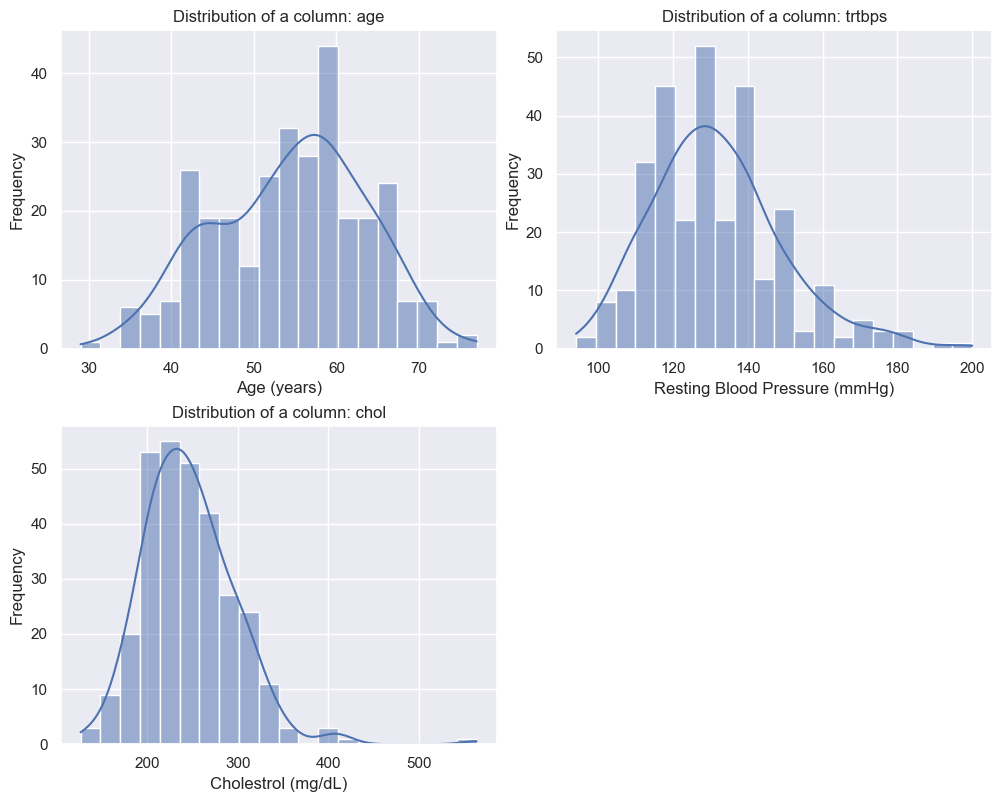

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# distribution of age
sns.histplot(data=df, x="age", kde=True, bins=20, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of a column: age')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_xlabel('Age (years)')

# distribution of trtbps
sns.histplot(data=df, x="trtbps", kde=True, bins=20, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of a column: trtbps')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_xlabel('Resting Blood Pressure (mmHg)')

# distribution of chol
sns.histplot(data=df, x="chol", kde=True, bins=20, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of a column: chol')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_xlabel('Cholestrol (mg/dL)')

axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Sub Task 3: Show Distribution of Different Categorical Variables (2 marks)

* Show distribution of values for sex, cp, fbs, restecg, exang and slope



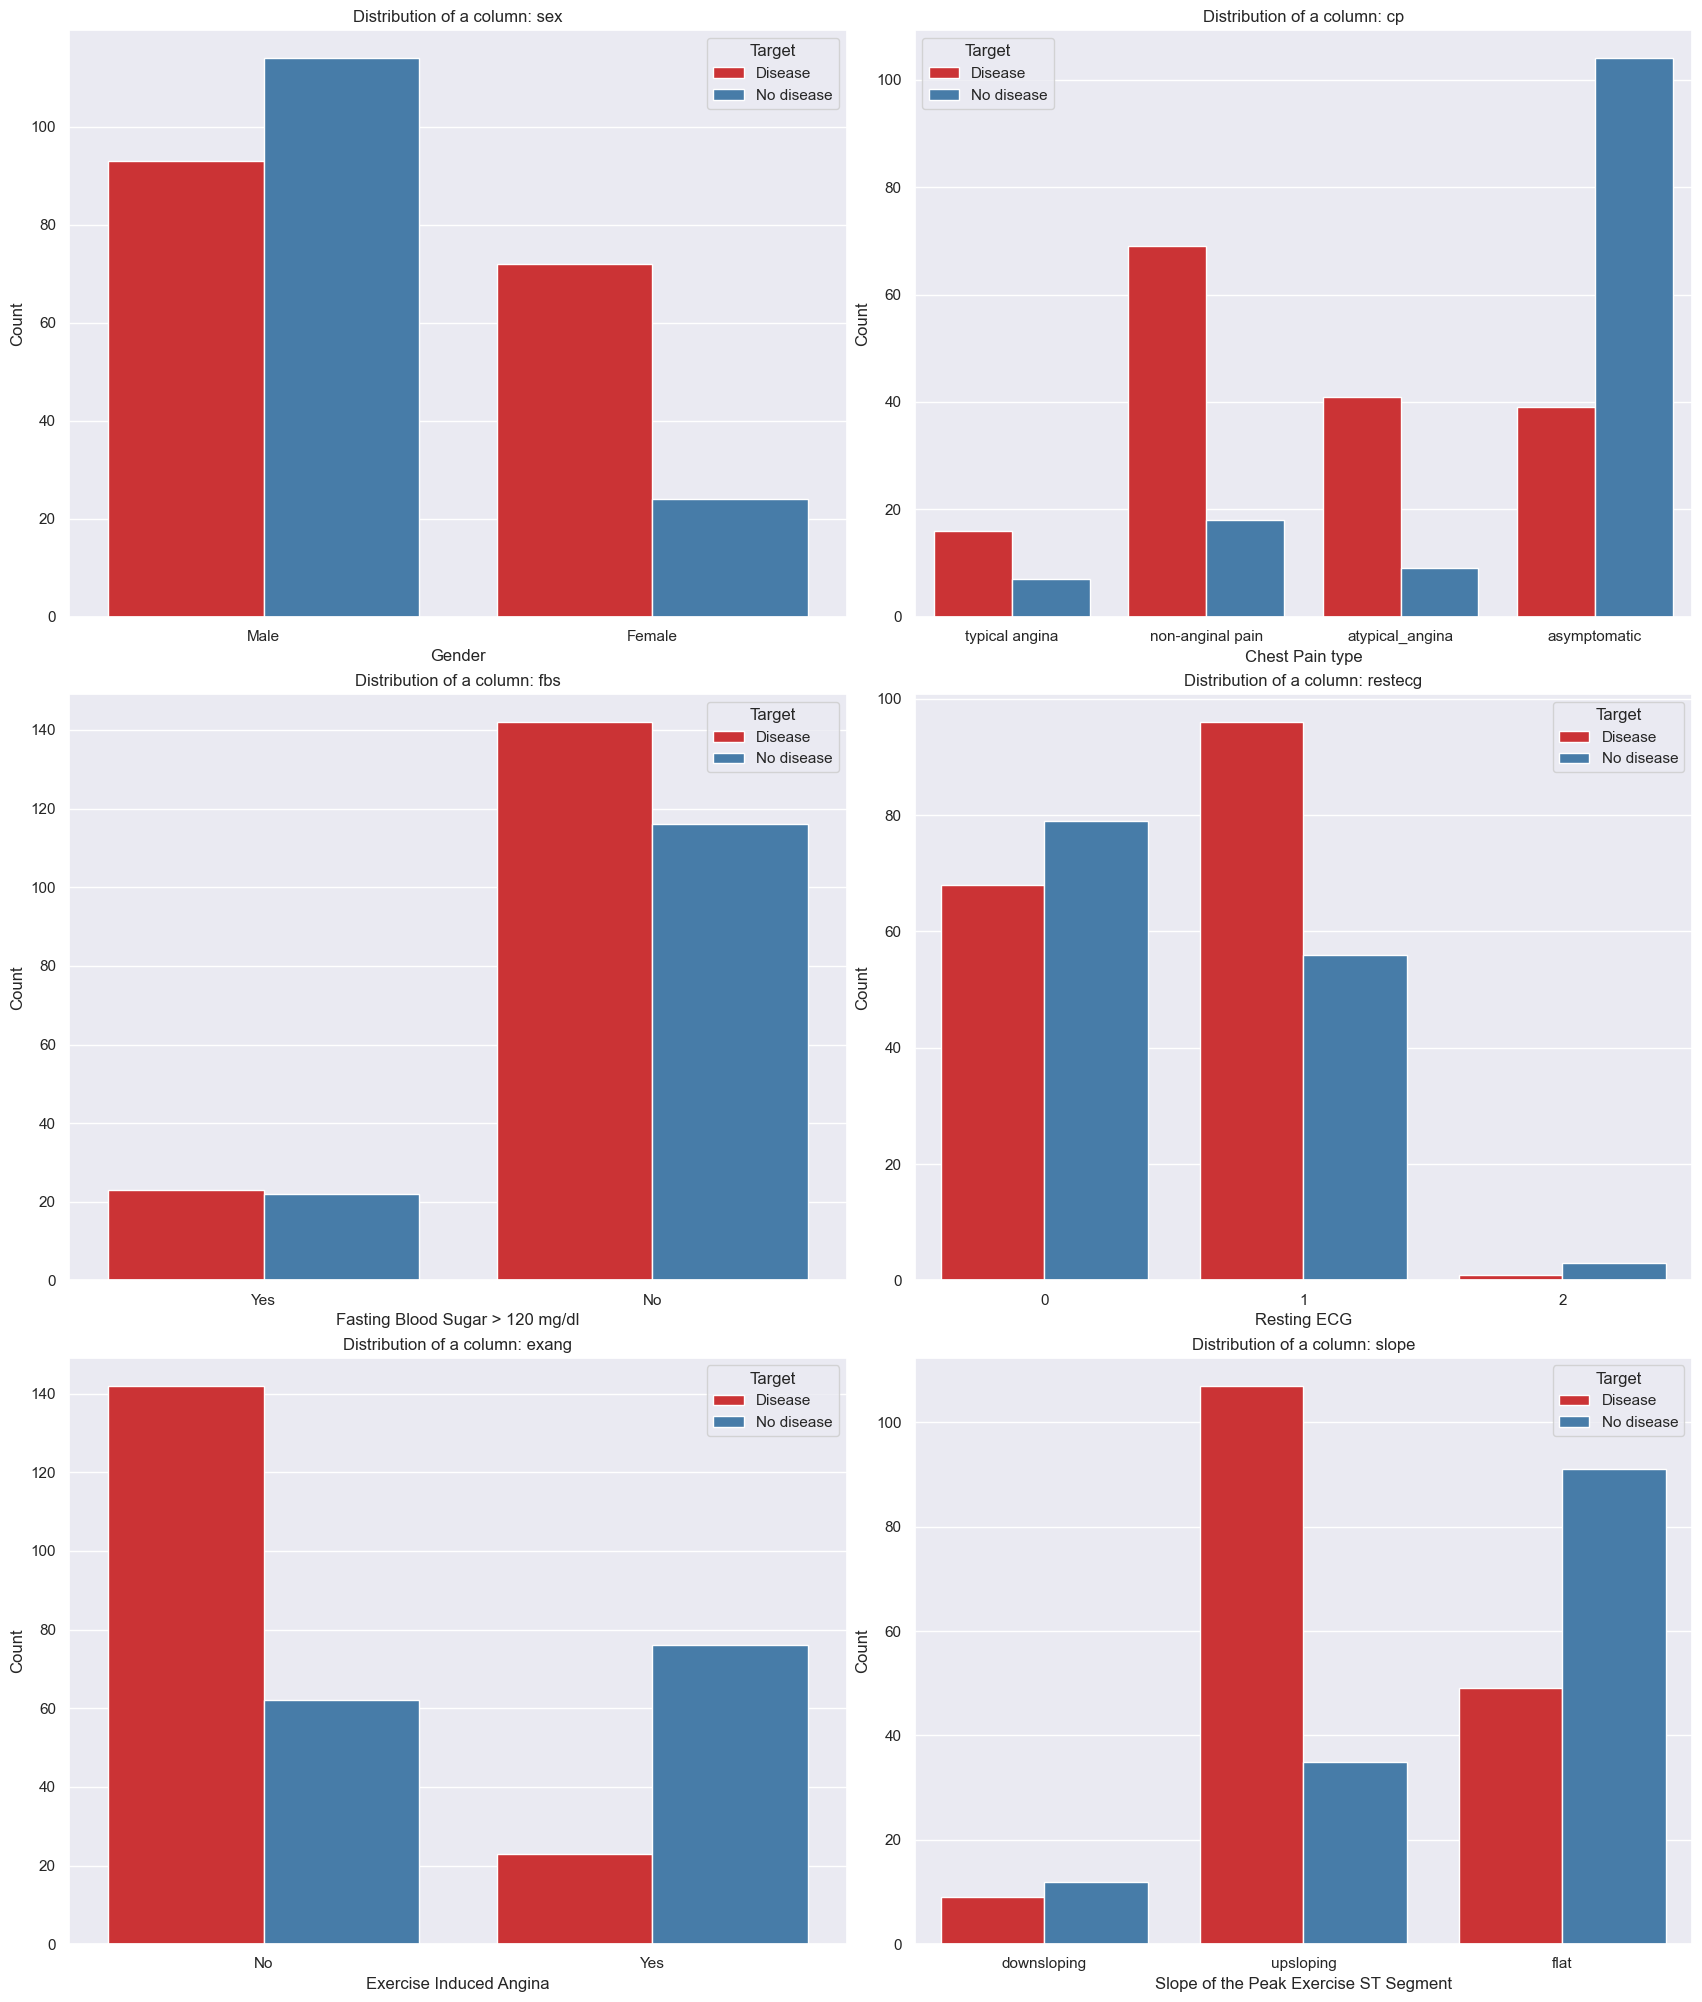

In [5]:
colors = sns.color_palette("Set1", 2)
palette = {'No disease': colors[1], 'Disease': colors[0]}  

fig, axs = plt.subplots(3, 2, figsize=(17, 20))

sns.countplot(data=df, x="sex", hue="target", ax=axs[0, 0], palette=palette)
axs[0, 0].set_title('Distribution of a column: sex')
axs[0, 0].set_ylabel('Count')
axs[0, 0].set_xlabel('Gender')
axs[0, 0].legend(title="Target")

sns.countplot(data=df, x="cp", hue="target", ax=axs[0, 1], palette=palette)
axs[0, 1].set_title('Distribution of a column: cp')
axs[0, 1].set_ylabel('Count')
axs[0, 1].set_xlabel('Chest Pain type')
axs[0, 1].legend(title="Target")

sns.countplot(data=df, x="fbs", hue="target", ax=axs[1, 0], palette=palette)
axs[1, 0].set_title('Distribution of a column: fbs')
axs[1, 0].set_ylabel('Count')
axs[1, 0].set_xlabel('Fasting Blood Sugar > 120 mg/dl')
axs[1, 0].legend(title="Target")

sns.countplot(data=df, x="restecg", hue="target", ax=axs[1, 1], palette=palette)
axs[1, 1].set_title('Distribution of a column: restecg')
axs[1, 1].set_ylabel('Count')
axs[1, 1].set_xlabel('Resting ECG')
axs[1, 1].legend(title="Target")

sns.countplot(data=df, x="exang", hue="target", ax=axs[2, 0], palette=palette)
axs[2, 0].set_title('Distribution of a column: exang')
axs[2, 0].set_ylabel('Count')
axs[2, 0].set_xlabel('Exercise Induced Angina')
axs[2, 0].legend(title="Target")

sns.countplot(data=df, x="slope", hue="target", ax=axs[2, 1], palette=palette)
axs[2, 1].set_title('Distribution of a column: slope')
axs[2, 1].set_ylabel('Count')
axs[2, 1].set_xlabel('Slope of the Peak Exercise ST Segment')
axs[2, 1].legend(title="Target")

plt.tight_layout()
plt.show()

# Sub Task 4: Create Box Plots (2 marks)

Create box plots to visualise the distribution of cholesterol and age by gender for disease and no disease group. 

/Users/daaa/opt/miniconda3/envs/it3386/lib/python3.9/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


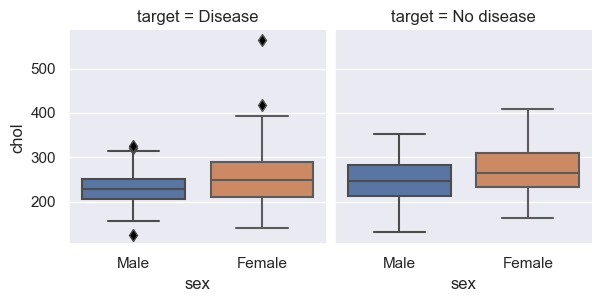

In [6]:
flierprops = dict(marker='d', markerfacecolor='black')

g = sns.FacetGrid(df, col="target", hue="sex", height=3)
g.map(sns.boxplot, "sex", "chol", linewidth=1.5, flierprops=flierprops)
# g.figure.set_size_inches(15, 10)

/Users/daaa/opt/miniconda3/envs/it3386/lib/python3.9/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


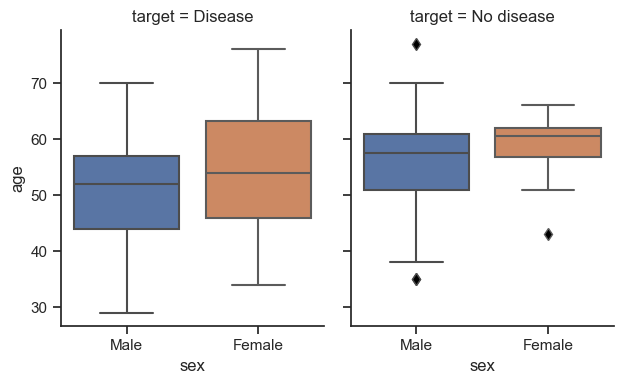

In [7]:
flierprops = dict(marker='d', markerfacecolor='black')
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

g = sns.FacetGrid(df, col="target", height=4, aspect=0.8, hue="sex")
g.map(sns.boxplot, "sex", "age", linewidth=1.5, flierprops=flierprops)
# g.figure.set_size_inches(15, 10)

# Sub Task 5: Linear Relationship Plots (2 marks)

Use linear relationship plots to  understand the following:
1. The relationship between age and chol in each of the target, based on sex.
2. The relationship between age and chol in each of the sex, based on target.


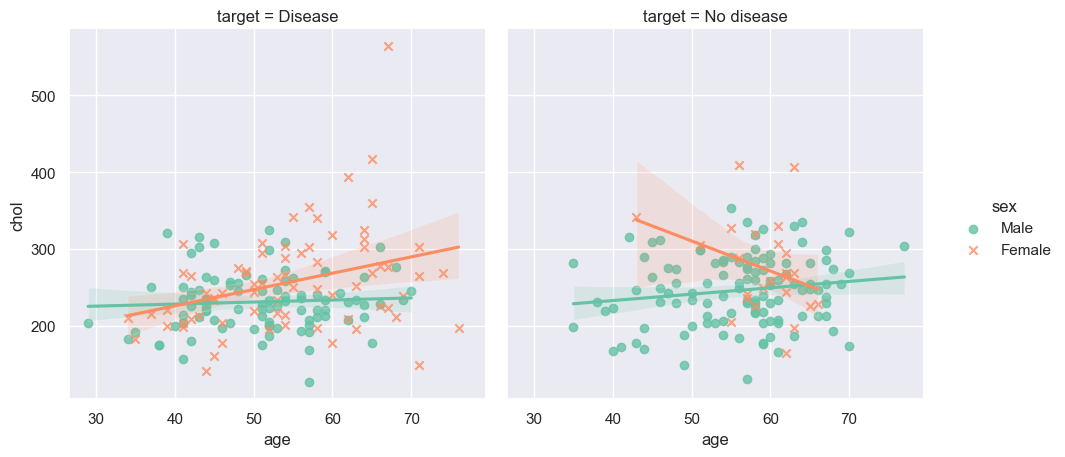

In [8]:
sns.set_theme()

palette = sns.color_palette("Set2")  
color_mapping = {"male": palette[2], "female": palette[1]} 

g = sns.lmplot(
    data=df,
    x="age",
    y="chol",
    col="target",
    hue="sex",
    height=4,
    aspect=1.0,
    markers=["o", "x"],
    palette=palette
)

g.set_titles("target = {col_name}")
g.figure.set_size_inches(11, 5)

plt.show()

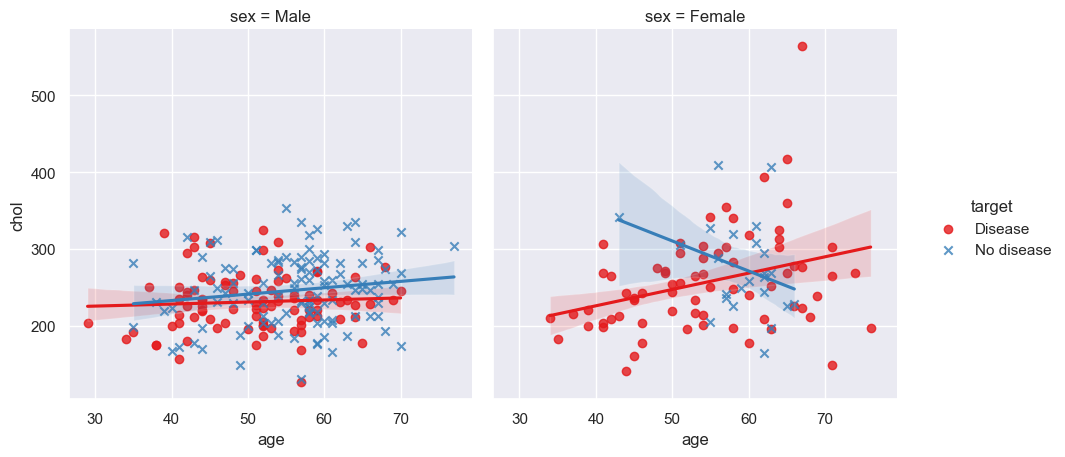

In [9]:
colors = sns.color_palette("Set1", 2)
palette = {'No disease': colors[1], 'Disease': colors[0]}  

g = sns.lmplot(
    data=df,
    x="age",
    y="chol",
    col="sex",
    hue="target",
    height=4,
    aspect=1.0,
    markers=["o", "x"],
    palette=palette
)

g.set_titles("sex = {col_name}")
g.figure.set_size_inches(11, 5)

# Sub Task 6: Create a Pairplot (1 mark)

Create a pairplot with the columns: age, chol, thal, oldpeak, trtbps.


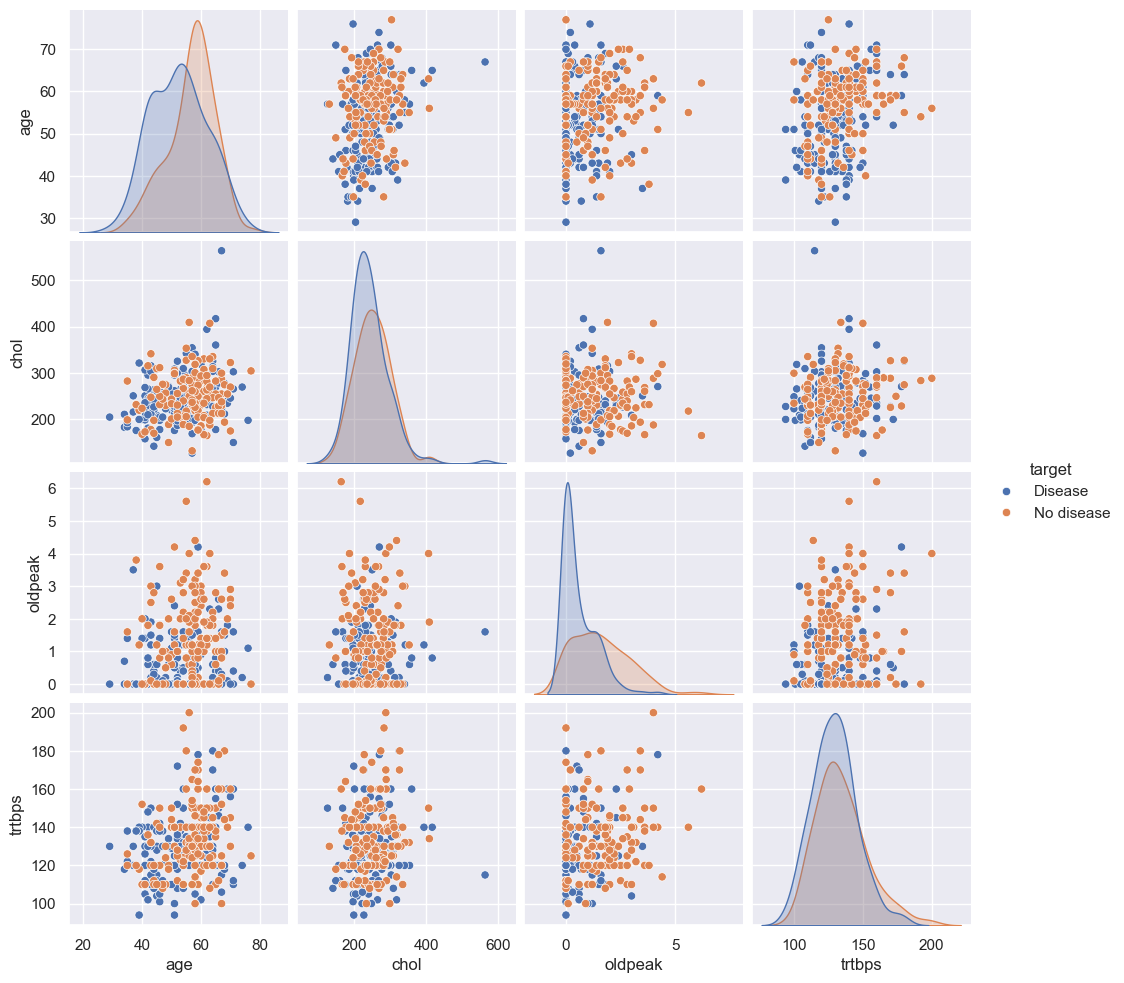

In [10]:
cols = ["age", "chol", "oldpeak", "trtbps"]
sns.pairplot(data=df, x_vars=cols, y_vars=cols, hue="target")

# Sub Task 7: Create Heatmap (2 marks)

1 Using the 6 selected region DataFrame, create a heatmap of the correlation matrix created when using the .corr() method on the transactions dataframe. Use the 'BuPu' color palette.

Text(0.5, 1.0, 'Correlation Between Variables')

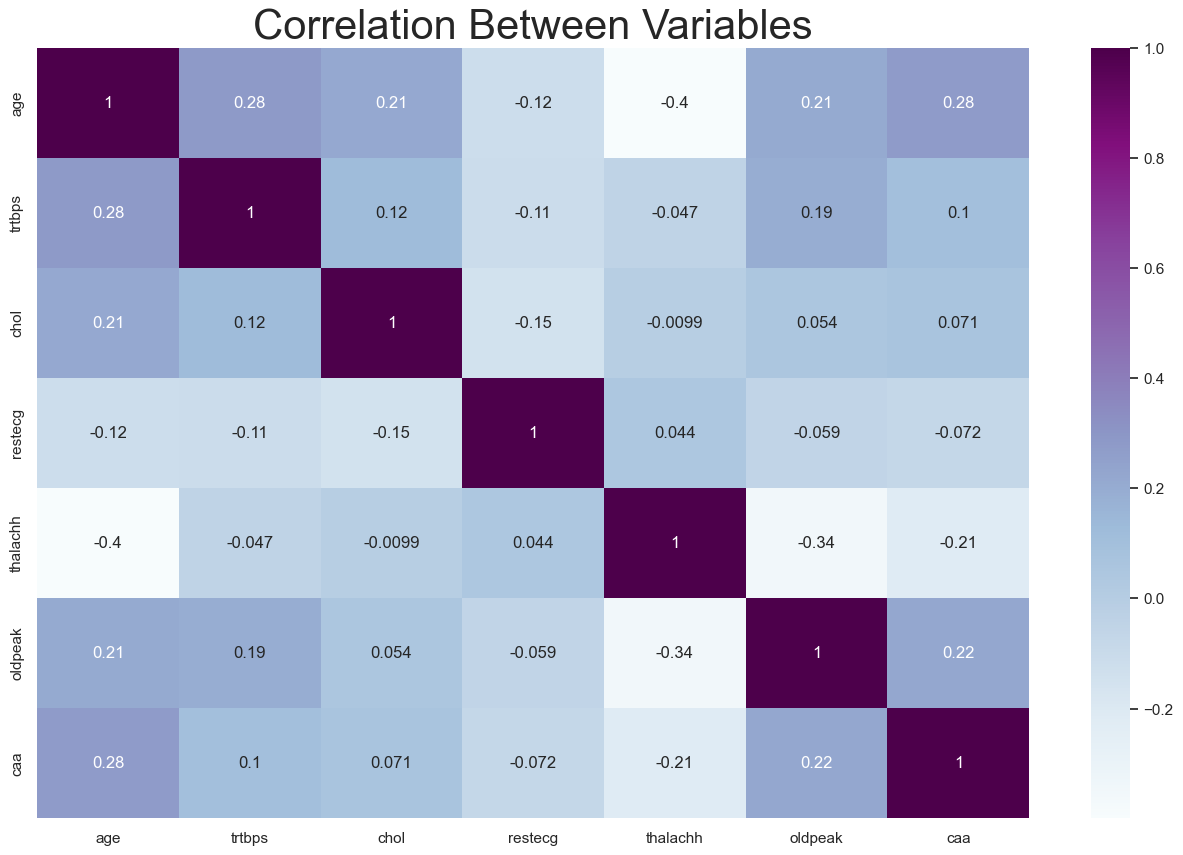

In [11]:
plt.figure(figsize=(16, 10))
# using the BuPU cmap so it looks a bit different, using Blues as the cmap will match exactly with the expected output
sns.heatmap(df.select_dtypes("number").corr(), cmap='BuPu', annot=True)
plt.title("Correlation Between Variables", fontsize=30)

# Sub Task 8: Conclusion (2 marks)

Summarise your data exploratory task in one or 2 paragraph(s)

An analysis of heart disease data across four regions (Cleveland, Hungary, Switzerland, and Long Beach V) reveals several noteworthy patterns. Looking at the demographics, Age distribution is left-skewed, with most patients around 60, and resting blood pressure is typically around 130 mmHg, though it is right-skewed. Cholesterol levels, averaging 220 mg/dL, are considered borderline high [1] and display left skewness. Male patients are overrepresented in the dataset, yet females show a higher proportion of heart disease cases. 

Analysing some of the other variables we notice that, Chest pain type appears relevant, as atypical angina is more commonly associated with heart disease, whereas fasting blood pressure has a limited impact on risk. Interestingly, the data suggests that heart disease occurs more often in individuals with a normal resting ECG than in left ventricular hypertrophy or in ST-T wave abnormality. However, Heart disease is more common in individuals with exercise-induced angina and an upsloping ST segment during peak exercise.cou

Further analysis using boxplots and scatterplots provides insights into bivariate/trivariate relationships. Females may be at a slightly higher risk due to older age and higher cholesterol levels on average. Age is positively correlated with heart disease likelihood, particularly for older women with elevated cholesterol. Oldpeak, or ST depression induced by exercise, is higher in those with heart disease, while maximum heart rate shows an expected decline with age, indicating age and maximum heart rate as potential interaction terms in predictive models.

Taking a look at the pairplots, the distribution of age among individuals with and without heart disease reveals a slight difference, with a notable presence of younger individuals in the heart disease group compared to older ones. Higher cholesterol levels are associated with an increased likelihood of heart disease, indicating that cholesterol may play a significant role in risk. The "oldpeak" feature, which represents ST depression induced by exercise relative to rest, shows clearer separation; individuals with higher "oldpeak" values are more commonly in the heart disease group, suggesting that exercise-induced ST depression could indicate elevated risk. Resting blood pressure does not show a strong separation between groups, though those with heart disease have a slight tendency toward higher blood pressure, though this pattern is less pronounced than in "oldpeak." Overall, pairwise plots show scattered distributions, indicating weak linear correlations among the variables and pointing to more complex, non-linear interactions that may contribute to heart disease.

Finally, the correlation analysis reveals that age and maximum heart rate achieved (thalachh) have a negative relationship, consistent with the decline in cardiovascular capacity with age; this age-thalachh interaction could be valuable in ML models. Additionally, "oldpeak" is moderately negatively correlated with maximum heart rate, suggesting that individuals with higher exercise-induced ST depression may struggle to reach higher heart rates and might have a greater heart disease risk. Age and resting blood pressure show a moderate positive correlation, reflecting the typical increase in blood pressure with age.

To summarise, key factors contributing to heart disease in this analysis include age, higher cholesterol levels, and chest pain type, particularly atypical angina. Exercise-induced ST depression ("oldpeak") is also a significant indicator, as higher "oldpeak" values are associated with heart disease. Gender shows a pattern as well, with females having a higher proportion of cases, likely due to older age and elevated cholesterol levels. Additionally, a lower maximum heart rate, which declines with age, and normal resting ECG are linked to heart disease, while fasting blood pressure has a limited impact on risk. When building predictive models, using interaction effects and feature engineering techniques based on some of the EDA insights mentioned can help to boost model performance further. 


Appendix: 
1. https://www.medicalnewstoday.com/articles/315900#:~:text=If%20total%20cholesterol%20levels%20are,risk%20factor%20for%20heart%20disease.